In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup
import time
import numpy as np
import pandas as pd

In [2]:
ser = Service('./pandas/chromedriver/chromedriver.exe')
driver = webdriver.Chrome(service = ser)

In [3]:
url = 'https://www.instagram.com/'
driver.get(url)

In [4]:
def insta_search(word):
    url = 'https://www.instagram.com/explore/tags/' + word
#     url = 'https://www.instagram.com/explore/tags/{}'.format(word)
    return url

In [5]:
word = 'Ï†úÏ£ºÎèÑÎßõÏßë'
url = insta_search(word)
url

'https://www.instagram.com/explore/tags/Ï†úÏ£ºÎèÑÎßõÏßë'

In [6]:
from selenium.webdriver.common.by import By

def select_first(driver):
    first = driver.find_element(By.CSS_SELECTOR, 'div._9AhH0')
    first.click()
    time.sleep(3)

select_first(driver)

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"div._9AhH0"}
  (Session info: chrome=97.0.4692.71)
Stacktrace:
Backtrace:
	Ordinal0 [0x0047FDC3+2555331]
	Ordinal0 [0x004177F1+2127857]
	Ordinal0 [0x00312E08+1060360]
	Ordinal0 [0x0033E49E+1238174]
	Ordinal0 [0x0033E69B+1238683]
	Ordinal0 [0x00369252+1413714]
	Ordinal0 [0x00357B54+1342292]
	Ordinal0 [0x003675FA+1406458]
	Ordinal0 [0x00357976+1341814]
	Ordinal0 [0x003336B6+1193654]
	Ordinal0 [0x00334546+1197382]
	GetHandleVerifier [0x00619622+1619522]
	GetHandleVerifier [0x006C882C+2336844]
	GetHandleVerifier [0x005123E1+541697]
	GetHandleVerifier [0x00511443+537699]
	Ordinal0 [0x0041D18E+2150798]
	Ordinal0 [0x00421518+2168088]
	Ordinal0 [0x00421660+2168416]
	Ordinal0 [0x0042B330+2208560]
	BaseThreadInitThunk [0x7781FA29+25]
	RtlGetAppContainerNamedObjectPath [0x77DD7A9E+286]
	RtlGetAppContainerNamedObjectPath [0x77DD7A6E+238]


In [ ]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
soup

In [ ]:
import unicodedata

content = soup.select('div.C4VMK > span')[0].text
content = unicodedata.normalize('NFC', content)

content

In [ ]:
import re

tags = re.findall(r'#[^\s#,\\]+', content)
tags

In [ ]:
date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]
date

In [ ]:
like = soup.select('a.zV_Nj > span')
like

In [ ]:
place = soup.select('a.O4GlU')
place = unicodedata.normalize('NFC', content)
place

In [ ]:
def get_content(driver):
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    try:
        content = soup.select('div.C4VMK > span')[0].text
        content = unicodedata.normalize('NFC', content)
    except:
        content = ' '
    try:
        tags = re.findall(r'#[^\s#,\\]+', content)
    except:
        tags = ''
    date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]
    try:    
        like = soup.select('a.zV_Nj > span')[0].text
    except:
        like = 0
    try:    
        place = soup.select('a.O4GlU')
        place = unicodedata.normalize('NFC', place)
    except:
        place = ''
    
    data = [content, date, like, place, tags]
    
    return(data)

In [ ]:
mylist = get_content(driver)
mylist

In [ ]:
def move_next(driver):
    right = driver.find_element(By.CSS_SELECTOR, 'div.l8mY4.feth3')
    right.click()
    time.sleep(3)

move_next(driver)

In [ ]:
def insta_crowling(word, n):
    url = insta_search(word)
    
    driver.get(url)
    time.sleep(5)
    
    select_first(driver)
    time.sleep(5)
    
    result = []
    
    for i in range(n):
        try:
            data = get_content(driver)
            result.append(data)
            move_next(driver)
        except:
            time.sleep(2)
            move_next(driver)
    return(result)

In [ ]:
result = insta_crowling('Ï†úÏ£ºÎèÑÎßõÏßë', 10)
result

In [ ]:
result_df = pd.DataFrame(result)
result_df.columns = ['content', 'date', 'like', 'place', 'tags']

result_df.head()

In [ ]:
jeju_insta_df = pd.DataFrame()

f_list = ['1_crawling_jejudoMatJip.xlsx', '1_crawling_jejudoGwanGwang.xlsx',
          '1_crawling_jejuMatJip.xlsx', '1_crawling_jejuYeoHang.xlsx']

for fname in f_list:
    fpath = './pandas/5_Jeju_Hotplace/files/' + fname
    temp = pd.read_excel(fpath)
    jeju_insta_df = jeju_insta_df.append(temp)

In [ ]:
jeju_insta_df.drop_duplicates(subset = ['content'], inplace = True)
jeju_insta_df.shape

In [ ]:
raw_total = pd.read_excel('./pandas/5_Jeju_Hotplace/files/1_crawling_raw.xlsx')
raw_total.head()

In [ ]:
location_counts = raw_total['place'].value_counts()
type(location_counts)

In [ ]:
location_counts_df = pd.DataFrame(location_counts)
type(location_counts_df)
location_counts_df.head()

# location_counts_df.to_execl('./pandas/5_Jeju_Hotplace/3_location_counts.xlsx', index = True)

In [17]:
locations = list(location_counts_df.index)
locations

NameError: name 'location_counts_df' is not defined

In [7]:
# ! pip install requests
import requests

In [8]:
searching = 'Ìï©Ï†ï Ïä§ÌÉÄÎ≤ÖÏä§'
url = 'http://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(searching)
url

'http://dapi.kakao.com/v2/local/search/keyword.json?query=Ìï©Ï†ï Ïä§ÌÉÄÎ≤ÖÏä§'

In [9]:
headers = {
    "Authorization": "KakaoAK 7a3af3adf3096046f94ddc76d9ef8866"
}

In [10]:
places = requests.get(url, headers = headers).json()['documents']

places[1]['place_name']
print('ÏúÑÎèÑ = ', places[1]['x'])
print('Í≤ΩÎèÑ = ', places[1]['y'])

ÏúÑÎèÑ =  126.91253700818196
Í≤ΩÎèÑ =  37.54994959743763


In [11]:
def find_places(searching):
    url = 'http://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(searching)
    headers = {
    "Authorization": "KakaoAK 7a3af3adf3096046f94ddc76d9ef8866"
    }
    places = requests.get(url, headers = headers).json()['documents']
    
    place = places[0]
    
    name = place['place_name']
    x = place['x']
    y = place['y']
    
    data = [name, x, y, searching]
    
    return(data)

In [12]:
data = find_places('Ï†úÏ£ºÍ≥µÌï≠')
data

['Ï†úÏ£ºÍµ≠Ï†úÍ≥µÌï≠', '126.492769004244', '33.5070789578184', 'Ï†úÏ£ºÍ≥µÌï≠']

In [18]:
locations_inform = []

for location in tqdm(locations[:200]):
    try:
        data = find_places(location)
        locations_inform.append(data)
        time.sleep(1)
    except:
        pass
    
locations_inform

NameError: name 'locations' is not defined

In [16]:
len(locations)

NameError: name 'locations' is not defined

In [14]:
# ! pip install tqdm
from tqdm.notebook import tqdm

In [21]:
locations_inform_df = pd.DataFrame(locations_inform)
locations_inform_df.columns = ['name_office', 'Í≤ΩÎèÑ', 'ÏúÑÎèÑ', 'name']
locations_inform_df.head()
# locations_inform_df.to_excel('./pandas/5_Jeju_Hotplace/3_locations_class.xlsx', index = False)

ValueError: Length mismatch: Expected axis has 0 elements, new values have 4 elements

In [20]:
location_counts_df = pd.read_excel('./pandas/5_Jeju_Hotplace/files/3_location_counts.xlsx', index_col = 0)
location_inform_df = pd.read_excel('./pandas/5_Jeju_Hotplace/files/3_locations.xlsx')

location_counts_df.head()
# location_inform_df.head()

place
Jeju                    271
Jeju-do                 179
Jungle Book by Alice    108
Seogwipo                 66
Ï†úÏ£ºÎèÑ ÌÅ¨Î¶¨Ïä§ÎßàÏä§ Î∞ïÎ¨ºÍ¥Ä            59

In [22]:
location_data = pd.merge(location_inform_df,
                        location_counts_df, how = 'inner',
                        left_on = 'name_official',
                        right_index = True)

location_data.head()

name_official          Í≤ΩÎèÑ         ÏúÑÎèÑ       Ïù∏Ïä§ÌÉÄÏúÑÏπòÎ™Ö  place
1          ÏÑúÍ∑ÄÌè¨Ïû†ÏàòÌï®  126.558616  33.239303     Seogwipo      1
308        ÏÑúÍ∑ÄÌè¨Ïû†ÏàòÌï®  126.558616  33.239303       ÏÑúÍ∑ÄÌè¨Ïû†ÏàòÌï®      1
3            Ìï†Î°úÎπÑÏπò  127.020826  37.518211         Ìï†Î°úÎπÑÏπò     51
4         Ï†úÏ£ºÏóêÏù∏Í∞êÍ∑§Î∞≠  126.539410  33.256610      Ï†úÏ£ºÏóêÏù∏Í∞êÍ∑§Î∞≠     48
5             Ï†úÏ£ºÎèÑ  126.545876  33.379777  Jeju Island      4

In [23]:
# ! pip install wordcloud
location_data['name_official'].value_counts()

Ïò§ÏÑ§Î°ùÌã∞ÎÆ§ÏßÄÏóÑ           3
ÏÑúÍ∑ÄÌè¨Ïû†ÏàòÌï®            2
Ï≤úÏßÄÏó∞Ìè≠Ìè¨             2
ÎπåÎùºÎìúÏïÑÌÜ†             2
ÎπÑÏûêÎ¶º               2
                 ..
Ìà¨Ïç∏ÌîåÎ†àÏù¥Ïä§ Ï†úÏ£ºÏï†ÏõîÌïúÎã¥Ï†ê    1
ÌïòÎäòÍ≥†Îûò              1
Î¨∏Ïèò                1
ÏÑ±ÏÇ∞ÏùºÏ∂úÎ¥â             1
Ïã†ÌíçÎ™©Ïû•              1
Name: name_official, Length: 416, dtype: int64

In [24]:
location_data = location_data.pivot_table(values = 'place',
                             index = ['name_official', 'Í≤ΩÎèÑ', 'ÏúÑÎèÑ'],
                             aggfunc = 'sum')
location_data

# location_data = location_data.pivot_table(index = ['name_official','Í≤ΩÎèÑ','ÏúÑÎèÑ'],
#                                           values = 'place',
#                                           aggfunc='sum')
# location_data.head()

place
name_official Í≤ΩÎèÑ         ÏúÑÎèÑ              
73st          126.455109 33.456989      1
Í∞ÄÎìúÎßùÏ†ú          126.532954 33.500991      1
Í∞ÄÎ∞∞            126.505570 33.231541      1
Í∞ÄÏãúÏãùÎãπ          126.771438 33.353060      2
Í∞ÄÏãúÏïÑÎ∞©Íµ≠Ïàò        126.918072 33.438605      2
...                                   ...
Ìô©Í∂ÅÏüÅÎ∞òÏßúÏû•        129.110405 35.197355      1
Ìô©Ïö∞ÏßÄÌï¥Ïïà         126.550528 33.241467      2
ÌõàÎÇ®ÌöüÏßë          126.667858 33.542086      1
ÌõàÏù¥ÎÑ§Í≥†ÏÇ¨Î¶¨Ïú°Í∞úÏû•     126.533934 33.487956      2
ÌùëÏÜ°            129.196513 35.175011      1

[417 rows x 1 columns]

In [25]:
location_data.sort_values('place', ascending=False)

place
name_official Í≤ΩÎèÑ         ÏúÑÎèÑ              
Ìï†Î°úÎπÑÏπò          127.020826 37.518211     51
Ï†úÏ£ºÏóêÏù∏Í∞êÍ∑§Î∞≠       126.539410 33.256610     48
ÏÑùÎ∂ÄÏûëÎ∞ïÎ¨ºÍ¥Ä        126.536502 33.250403     36
ÏúÑÎØ∏ÎèôÎ∞±ÎÇòÎ¨¥Íµ∞ÎùΩ      126.674731 33.272939     18
Î∞•Íπ°Ìå®           126.263436 33.410093     16
...                                   ...
ÏÇ∞Î∞©ÏÇ∞           126.313425 33.241304      1
ÏÇ¨Ïù¥Ïπ¥Î†à          126.381107 33.484245      1
ÏÇ¨ÎùΩ            126.307741 33.228771      1
ÎΩïÎÅÑÎûë           126.555112 33.243034      1
ÌùëÏÜ°            129.196513 35.175011      1

[417 rows x 1 columns]

In [26]:
# pip install folium
import folium

In [27]:
# Í∏∞Î≥∏Ï¢åÌëú
latitude = 37.394946
longitude = 127.111104

m = folium.Map(location = [latitude, longitude],
              width = 700,
              hight = 300,
              zoom_start = 15)

folium.Marker(location = [latitude, longitude],
             popup = '<iframe width="703" height="395" src="https://www.youtube.com/embed/h8V3bm8ioGM" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>',
             tooltip = 'ÏÑ†Î¶âÏó≠ Î©ÄÌã∞Ï∫†ÌçºÏä§',
             icon = folium.Icon(color = 'red',
                               icon_color = 'white',
                                icon = 'wifi',
                               prefix = 'fa')).add_to(m)  #fontawesome


folium.CircleMarker(location = [latitude, longitude],
                   color = 'tomato',
                   radius = 50,
                   tooltip = 'ÌôúÎèôÎ∞òÍ≤Ω',
                    ).add_to(m)

m

In [28]:
location_data = pd.read_excel('./pandas/5_Jeju_Hotplace/files/3_location_inform.xlsx')
location_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name_official  416 non-null    object 
 1   Í≤ΩÎèÑ             417 non-null    float64
 2   ÏúÑÎèÑ             417 non-null    float64
 3   place          417 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 13.2+ KB


In [29]:
Mt_Hanla = [33.362500, 126.533694]
map_jeju = folium.Map(location = Mt_Hanla,
                     zoom_start = 10)
folium.TileLayer().add_to(map_jeju)  #https://deparkes.co.uk/2016/06/10/folium-map-tiles/

for i in range(len(location_data)):
    name = location_data['name_official'][i]
    count = location_data['place'][i]
    size = int(count*2)
    lng = location_data['Í≤ΩÎèÑ'][i]
    lat = location_data['ÏúÑÎèÑ'][i]
    folium.CircleMarker(location = [lat, lng],
                       radius = size,
                       color = 'red',
                       popup = name).add_to(map_jeju)

    
map_jeju

In [ ]:
# map_jeju.save('./pandas/5_Jeju_Hotplace/3_jeju.html')

from folium.plugins import MarkerCluster

In [ ]:
locations = []
names = []

for i in range(len(location_data)):
    data = location_data.iloc[i]
    locations.append([data['ÏúÑÎèÑ'], data['Í≤ΩÎèÑ']])
    names.append(data['name_official'])
    
# locations
# names

Mt_Hanla = [33.362500, 126.533694]
map_jeju2 = folium.Map(location = Mt_Hanla, zoom_start = 10)

tiles = ['stamenwatercolor', 'cartodbpositron', 
         'openstreetmap', 'stamenterrain',
#         'Mapbox Control Room'
        ]

for tile in tiles:
    folium.TileLayer(tile).add_to(map_jeju2)
    
marker_cluster = MarkerCluster(locations = locations,
                             popups = names,
                             name = 'Jeju',
                             overlay = True,
                             control = True).add_to(map_jeju2)

folium.LayerControl().add_to(map_jeju2)

map_jeju2

In [ ]:
# map_jeju2.save('./pandas/5_Jeju_Hotplace/3_jeju_cluster.html')

In [ ]:
raw_total = pd.read_excel('./pandas/5_Jeju_Hotplace/files/1_crawling_raw.xlsx')
raw_total.head()

In [ ]:
select_word = 'Ìï¥ÎèãÏù¥'

check_list = []

for content in raw_total['content']:
    if select_word in content:
        check_list.append(True)
    else:
        check_list.append(False)

# check_list
select_df = raw_total[check_list]
# len(select_df['content'])

In [ ]:
select_df.index

for i in select_df.index:
    print(select_df.loc[i,'content'])
    print('-'*50)

In [ ]:
select_word_list = ['Ìï¥ÎèãÏù¥','Î∞ïÎ¨ºÍ¥Ä','ÌûêÎßÅ','Í≤åÏä§Ìä∏ÌïòÏö∞Ïä§','ÏÑ≠ÏßÄÏΩîÏßÄ']

def select_word(select_word_list):
    for select_word in select_word_list:
        check_list = []
        for content in raw_total['content']:
            if select_word in content:
                check_list.append(True)
            else:
                check_list.append(False)
        select_df = raw_total[check_list]
        fpath = './pandas/5_Jeju_Hotplace/4_select_data_class{}.xlsx'.format(select_word)
        select_df.to_excel(fpath, index = False)

In [ ]:
select_word_list = ['Ìï¥ÎèãÏù¥','Î∞ïÎ¨ºÍ¥Ä','ÌûêÎßÅ','Í≤åÏä§Ìä∏ÌïòÏö∞Ïä§','ÏÑ≠ÏßÄÏΩîÏßÄ']
select_word(select_word_list)

In [ ]:
# !pip install wordcloud

In [1]:
import pandas as pd
import wordcloud

In [2]:
raw_total = pd.read_excel('./pandas/5_Jeju_Hotplace/1_crawling_raw.xlsx')
raw_total.head()

content        date like   place  \
0  Ï†úÏ£ºÎèÑ ÎèÑÏ∞©~~Í≥µÌï≠Í∑ºÏ≤ò #Ï†úÏ£ºÎ∂ÑÏãù ÏóêÏÑú Î®πÏùÄ Ï≤´ÏãùÏÇ¨ÎßåÏ°±ÎßåÏ°±!#Ï†úÏ£ºÎßõÏßë#Ï†úÏ£ºÎèÑÎßõÏßë#Ï†ú...  2019-01-01  705     NaN   
1  Ôªø#Ìï®ÎçïÎßõÏßë Î¨¥Í±∞Î≤ÑÍ±∞ Î∞îÎã§ Î≥¥Î©¥ÏÑú Î®πÏúºÎãàÍπå Îçî ÍøÄÎßõüëçüèª #Ï†úÏ£ºÎèÑÏπ¥ÌéòÌà¨Ïñ¥#Ï†úÏ£ºÏùºÏÉÅ#Ìï®...  2019-01-01  384     NaN   
2  .ÎåÄÎßåÏ°± Ï†úÏ£ºÏä§!.#ÎèôÎ¨∏ÏãúÏû•#Ï†úÏ£ºÎèôÎ¨∏ÏãúÏû•#Ï†úÏ£ºÎèÑÍ∏∞ÎÖêÌíà#Ï†úÏ£ºÍ∏∞ÎÖêÌíà#Ï†úÏ£ºÏä§ÎäîÏôÑÎ≤Ω#Ï†úÏ£ºÎèÑ...  2019-01-01  595     NaN   
3  #Ï†úÏ£ºÏó¨Ìñâ#2ÏùºÏ∞®Î¨¥Í±∞Î≤ÑÍ±∞ Ï†úÏ£ºÏôÄÏÑú Î®πÏùÄÍ≤ÉÏ§ëÏóê Ï†úÏùº ÎßõÏûàÏóàÏùå!#Ï†úÏ£ºÎèÑÏó¨Ìñâ#Ï†úÏ£ºÎßõÏßë#Ìï®...  2019-01-01  412     NaN   
4  ü•á1Ïõî ÏòÅÏóÖ ÏïàÎÇ¥ü•á-1Ïõî 2Ïùº, 3Ïùº(Ïàò,Î™©)ÏùÄ Ïâ¨Ïñ¥Í∞ëÎãàÎã§-1Ïõî 4Ïùº,5Ïùº,6Ïùº(Í∏à...  2019-01-01  364  Î°úÌÉÄÎ¶¨Í≥ºÏûêÏ†ê   

                                                tags  
0  ['#Ï†úÏ£ºÎ∂ÑÏãù', '#Ï†úÏ£ºÎßõÏßë', '#Ï†úÏ£ºÎèÑÎßõÏßë', '#Ï†úÏ£ºÎßõÏßëÏ∂îÏ≤ú', '#Ï†úÏ£ºÎèÑÎßõ...  
1  ['#Ìï®ÎçïÎßõÏßë', '#Ï†úÏ£ºÎèÑÏπ¥ÌéòÌà¨Ïñ¥', '#Ï†úÏ£ºÏùºÏÉÅ', '#Ìï®Îçï', '#jejudo...  
2  ['#ÎèôÎ¨∏ÏãúÏû•', '#Ï†úÏ£ºÎèôÎ¨∏ÏãúÏû•', '#Ï†úÏ£ºÎèÑÍ∏∞ÎÖêÌíà', '#Ï†úÏ£ºÍ∏∞ÎÖêÌíà', '#Ï†úÏ£º...  
3  ['#Ï†úÏ£ºÏó¨Ìñâ', '#2ÏùºÏ∞®Î¨¥Í±∞Î≤ÑÍ±∞', '#Ï†úÏ£ºÎèÑÏó¨Ìñâ', '#Ï†úÏ£ºÎßõÏßë', '#Ìï®ÎçïÎßõ...  
4                                                 []

In [3]:
raw_total['tags'][:10]

0    ['#Ï†úÏ£ºÎ∂ÑÏãù', '#Ï†úÏ£ºÎßõÏßë', '#Ï†úÏ£ºÎèÑÎßõÏßë', '#Ï†úÏ£ºÎßõÏßëÏ∂îÏ≤ú', '#Ï†úÏ£ºÎèÑÎßõ...
1    ['#Ìï®ÎçïÎßõÏßë', '#Ï†úÏ£ºÎèÑÏπ¥ÌéòÌà¨Ïñ¥', '#Ï†úÏ£ºÏùºÏÉÅ', '#Ìï®Îçï', '#jejudo...
2    ['#ÎèôÎ¨∏ÏãúÏû•', '#Ï†úÏ£ºÎèôÎ¨∏ÏãúÏû•', '#Ï†úÏ£ºÎèÑÍ∏∞ÎÖêÌíà', '#Ï†úÏ£ºÍ∏∞ÎÖêÌíà', '#Ï†úÏ£º...
3    ['#Ï†úÏ£ºÏó¨Ìñâ', '#2ÏùºÏ∞®Î¨¥Í±∞Î≤ÑÍ±∞', '#Ï†úÏ£ºÎèÑÏó¨Ìñâ', '#Ï†úÏ£ºÎßõÏßë', '#Ìï®ÎçïÎßõ...
4                                                   []
5    ['#Ï†úÏ£ºÎßàÏπ¥Î°±', '#ÏõîÏ†ïÎ¶¨Ïπ¥ÌéòÏΩßÏàòÏóº', '#ÏõîÏ†ïÎ¶¨ÎßõÏßë', '#ÏõîÏ†ïÎ¶¨Ïπ¥Ìéò', '#...
6                                                   []
7    ['#Ï†úÏ£ºÎ∂ÑÏãù', '#Ï†úÏ£ºÎ™®Îã•ÏπòÍ∏∞', '#ÎèîÎ≤†ÎùºÎ©¥', '#ÎèîÎ≤†ÎçÆÎ∞•', '#Ï†ÑÎ≥µÍπÄÎ∞•'...
8    ['#Ï†úÏ£ºÎèÑ', '#Ï†úÏ£ºÎßõÏßë', '#Ï†úÏ£ºÎèÑÎßõÏßë', '#ÏõîÏ†ïÎ¶¨ÎßõÏßë', '#ÏõîÏ†ïÎ¶¨', ...
9    ['#ÏÑúÎ©¥ÌÅ¥ÎüΩ', '#Ïª§ÌîåÏó¨Ìñâ', '#Ïó¨ÏûêÏò∑', '#Ïû†Ïã§Ïπ¥Ìéò', '#ÎèÖÏÜå', '#Í∞ï...
Name: tags, dtype: object

In [48]:
tags_total = []

for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '")
    for tags in tags_list:
        tags_total.append(tags)
        
tags_total

['#Ï†úÏ£ºÎ∂ÑÏãù',
 '#Ï†úÏ£ºÎßõÏßë',
 '#Ï†úÏ£ºÎèÑÎßõÏßë',
 '#Ï†úÏ£ºÎßõÏßëÏ∂îÏ≤ú',
 '#Ï†úÏ£ºÎèÑÎßõÏßëÏ∂îÏ≤ú',
 '#Ï†úÏ£ºÎèÑ',
 '#Ï†úÏ£ºÎßõÏßë',
 '#Ïö©ÎëêÏïî',
 '#Ïã†Ï†úÏ£ºÎßõÏßë',
 '#Ïó∞ÎèôÎßõÏßë',
 '#Ï†úÏ£ºÏó∞ÎèôÎßõÏßë',
 '#Ïï†ÏõîÎßõÏßë',
 '#Ïó∞ÎèôÏ†úÏ£ºÎ∂ÑÏãù',
 '#Ï†úÏ£ºÍ≥µÌï≠Í∑ºÏ≤òÎßõÏßë',
 '#Ï†úÏ£ºÍ≥µÌï≠ÎßõÏßë',
 '#ÎèîÎ≤†ÍπÄÎ∞•',
 '#Ï†ÑÎ≥µÍπÄÎ∞•',
 '#Ï†úÏ£ºÎèàÍπåÏä§',
 '#jeju',
 '#Ï†úÏ£ºÎèÑÍ∞ÄÎ≥ºÎßåÌïúÍ≥≥',
 '#Ìï®ÎçïÎßõÏßë',
 '#Ï†úÏ£ºÎèÑÏπ¥ÌéòÌà¨Ïñ¥',
 '#Ï†úÏ£ºÏùºÏÉÅ',
 '#Ìï®Îçï',
 '#jejudo',
 '#jeju',
 '#Ï†úÏ£ºÎèÑÎßõÏßë',
 '#Ìï®ÎçïÎßõÏßëÎ¨¥Í±∞Î≤ÑÍ±∞Ïß±',
 '#ÏùºÏÉÅ',
 '#Ï†úÏ£ºÏÇ¥Ïù¥',
 '#Ï†úÏ£ºÎèÑÏÇ¥Ïù¥',
 '#Ìï®ÎçïÌï¥ÏàòÏöïÏû•',
 '#Ìï®ÎçïÏπ¥Ìéò',
 '#Ìï®ÎçïÎßõÏßë',
 '#Ï†úÏ£ºÏπ¥Ìéò',
 '#Ï†úÏ£ºÎèÑÏπ¥Ìéò',
 '#Ï†úÏ£ºÎèÑÎßõÏßëÏ∂îÏ≤ú',
 '#Ï†úÏ£ºÎèÑÎØº',
 '#Ï†úÏ£ºÎèÑÎØºÎßõÏßë',
 '#Ï†úÏ£ºÎèÑÎßõÏßë',
 '#Ï†úÏ£ºÎßõÏßë',
 '#Ï†úÏ£ºÎèÑÏó¨Ìñâ',
 '#ÎèôÎ¨∏ÏãúÏû•',
 '#Ï†úÏ£ºÎèôÎ¨∏ÏãúÏû•',
 '#Ï†úÏ£ºÎèÑÍ∏∞ÎÖêÌíà',
 '#Ï†úÏ£ºÍ∏∞ÎÖêÌíà',
 '#Ï†úÏ£ºÏä§ÎäîÏôÑÎ≤Ω',
 '#Ï†úÏ£ºÎèÑÎßõÏßë',
 '#Ï†úÏ£ºÎßõÏßë',
 '#Ï†úÏ£

In [45]:
from collections import Counter
tag_counts = Counter(tags_total)

tag_counts_selected = tag_counts.most_common(50)
tag_counts_selected

[('#Ï†úÏ£ºÎßõÏßë', 3412),
 ('#Ï†úÏ£ºÎèÑÎßõÏßë', 3149),
 ('#Ï†úÏ£ºÏó¨Ìñâ', 3020),
 ('#Ï†úÏ£ºÍ¥ÄÍ¥ë', 2827),
 ('#Ï†úÏ£ºÎèÑ', 2053),
 ('#Ï†úÏ£º', 1538),
 ('#Ï†úÏ£ºÎèÑÏó¨Ìñâ', 1454),
 ('#ÏÑúÍ∑ÄÌè¨ÎßõÏßë', 1330),
 ('#Ï†úÏ£ºÎèÑÍ∞ÄÎ≥ºÎßåÌïúÍ≥≥', 1014),
 ('#Ï†úÏ£ºÌï´ÌîåÎ†àÏù¥Ïä§', 835),
 ('#ÏÑúÍ∑ÄÌè¨', 825),
 ('#jeju', 749),
 ('#ÏùºÏÉÅ', 701),
 ('#Ï†úÏ£ºÌùëÎèºÏßÄÎßõÏßë', 685),
 ('#Ï†úÏ£ºÎßõÏßëÏ∂îÏ≤ú', 675),
 ('#Ï†úÏ£ºÎèÑÌùëÎèºÏßÄÎßõÏßë', 669),
 ('#Ï†úÏ£ºÎèÑÌùëÎèºÏßÄ', 663),
 ('#ÏÑ±ÏÇ∞ÏùºÏ∂úÎ¥â', 650),
 ('#Ï†úÏ£ºÌùëÎèºÏßÄ', 648),
 ('#ÌòëÏû¨ÎßõÏßë', 602),
 ('#Ï†úÏ£ºÏπ¥Ìéò', 600),
 ('#Ï†úÏ£ºÎèÑÍ∑∏Îû®', 594),
 ('#ÏÑúÍ∑ÄÌè¨ÌùëÎèºÏßÄÎßõÏßë', 593),
 ('', 587),
 ('#ÏÑúÍ∑ÄÌè¨ÌùëÎèºÏßÄ', 577),
 ('#Ï†úÏ£ºÎèÑÎØº', 570),
 ('#ÏÑ≠ÏßÄÏΩîÏßÄ', 556),
 ('#ÏÑ±ÏÇ∞ÏùºÏ∂úÎ¥âÎßõÏßë', 545),
 ('#ÏÑ≠ÏßÄÏΩîÏßÄÎßõÏßë', 511),
 ('#ÏÑ†Ìåî', 503),
 ('#Ï†úÏ£ºÍ∞ÄÎ≥ºÎßåÌïúÍ≥≥', 497),
 ('#ÌÜµÍ∞àÏπòÍµ¨Ïù¥', 494),
 ('#Ï†úÏ£ºÌÜµÍ∞àÏπòÍµ¨Ïù¥', 485),
 ('#Ï†úÏ£ºÌï´Ìîå', 483),
 ('#Ï†úÏ£ºÏÇ¥Ïù¥', 480),
 ('#Ï†úÏ£ºÏÑúÍ∑ÄÌè¨ÎßõÏßë', 479),
 

In [49]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud 
import platform

In [50]:
font_path = 'c://Windows/Fonts/malgun.ttf'

In [51]:
STOPWORDS = ['#ÏùºÏÉÅ', '#ÏÑ†Ìåî', '#Ï†úÏ£ºÎèÑ', '#jeju', '#Î∞òÏòÅÍµ¨', '#Ï†úÏ£ºÏûêÏó∞ÎààÏçπ',
'#ÏÑúÍ∑ÄÌè¨ÎààÏçπÎ¨∏Ïã†', '#Ï†úÏ£ºÎààÏçπÎ¨∏Ïã†', '#ÏÜåÌÜµ', '#ÎßûÌåî','#Ï†úÏ£ºÎààÏçπÎ¨∏Ïã†','#ÏÑúÍ∑ÄÌè¨ÎààÏçπÎ¨∏Ïã†','#ÎààÏçπÎ¨∏Ïã†',
            '#Ï†úÏ£ºÏÜçÎààÏçπ','#Ï†úÏ£ºÎÇ®ÏûêÎààÏçπÎ¨∏Ïã†','#ÏÑúÍ∑ÄÌè¨ÏûêÏó∞ÎààÏçπ','#ÏÑúÍ∑ÄÌè¨ÎÇ®ÏûêÎààÏçπÎ¨∏Ïã†',
            '#ÏÑúÍ∑ÄÌè¨Î∞òÏòÅÍµ¨','#Ï†úÏ£ºÎ©îÏù¥ÌÅ¨ÏóÖ','#Ï†úÏ£ºÎ∞òÏòÅÍµ¨','#ÏÑúÍ∑ÄÌè¨ÏÜçÎààÏçπ','#daily',
            '#Í∞ÄÏ°±Ïó¨Ìñâ','#jejuisland','','#ÏÖÄÏπ¥','#Ï†úÏ£ºÏÜçÎààÏçπÏó∞Ïû•','#Ï¢ãÏïÑÏöî',]

tag_total_selected = []

for tag in tags_total:
    if not tag in STOPWORDS:
        tag_total_selected.append(tag)

tag_counts_selected = Counter(tag_total_selected)
tag_counts_selected.most_common(50)

[('#Ï†úÏ£ºÎßõÏßë', 3412),
 ('#Ï†úÏ£ºÎèÑÎßõÏßë', 3149),
 ('#Ï†úÏ£ºÏó¨Ìñâ', 3020),
 ('#Ï†úÏ£ºÍ¥ÄÍ¥ë', 2827),
 ('#Ï†úÏ£º', 1538),
 ('#Ï†úÏ£ºÎèÑÏó¨Ìñâ', 1454),
 ('#ÏÑúÍ∑ÄÌè¨ÎßõÏßë', 1330),
 ('#Ï†úÏ£ºÎèÑÍ∞ÄÎ≥ºÎßåÌïúÍ≥≥', 1014),
 ('#Ï†úÏ£ºÌï´ÌîåÎ†àÏù¥Ïä§', 835),
 ('#ÏÑúÍ∑ÄÌè¨', 825),
 ('#Ï†úÏ£ºÌùëÎèºÏßÄÎßõÏßë', 685),
 ('#Ï†úÏ£ºÎßõÏßëÏ∂îÏ≤ú', 675),
 ('#Ï†úÏ£ºÎèÑÌùëÎèºÏßÄÎßõÏßë', 669),
 ('#Ï†úÏ£ºÎèÑÌùëÎèºÏßÄ', 663),
 ('#ÏÑ±ÏÇ∞ÏùºÏ∂úÎ¥â', 650),
 ('#Ï†úÏ£ºÌùëÎèºÏßÄ', 648),
 ('#ÌòëÏû¨ÎßõÏßë', 602),
 ('#Ï†úÏ£ºÏπ¥Ìéò', 600),
 ('#Ï†úÏ£ºÎèÑÍ∑∏Îû®', 594),
 ('#ÏÑúÍ∑ÄÌè¨ÌùëÎèºÏßÄÎßõÏßë', 593),
 ('#ÏÑúÍ∑ÄÌè¨ÌùëÎèºÏßÄ', 577),
 ('#Ï†úÏ£ºÎèÑÎØº', 570),
 ('#ÏÑ≠ÏßÄÏΩîÏßÄ', 556),
 ('#ÏÑ±ÏÇ∞ÏùºÏ∂úÎ¥âÎßõÏßë', 545),
 ('#ÏÑ≠ÏßÄÏΩîÏßÄÎßõÏßë', 511),
 ('#Ï†úÏ£ºÍ∞ÄÎ≥ºÎßåÌïúÍ≥≥', 497),
 ('#ÌÜµÍ∞àÏπòÍµ¨Ïù¥', 494),
 ('#Ï†úÏ£ºÌÜµÍ∞àÏπòÍµ¨Ïù¥', 485),
 ('#Ï†úÏ£ºÌï´Ìîå', 483),
 ('#Ï†úÏ£ºÏÇ¥Ïù¥', 480),
 ('#Ï†úÏ£ºÏÑúÍ∑ÄÌè¨ÎßõÏßë', 479),
 ('#Ï†úÏ£ºÎèÑÎØºÎßõÏßë', 477),
 ('#Ïó¨ÌñâÏä§ÌÉÄÍ∑∏Îû®', 472),
 ('#Ï†úÏ£ºÎèÑÍ¥ÄÍ¥ë', 440),
 

(-0.5, 799.5, 399.5, -0.5)

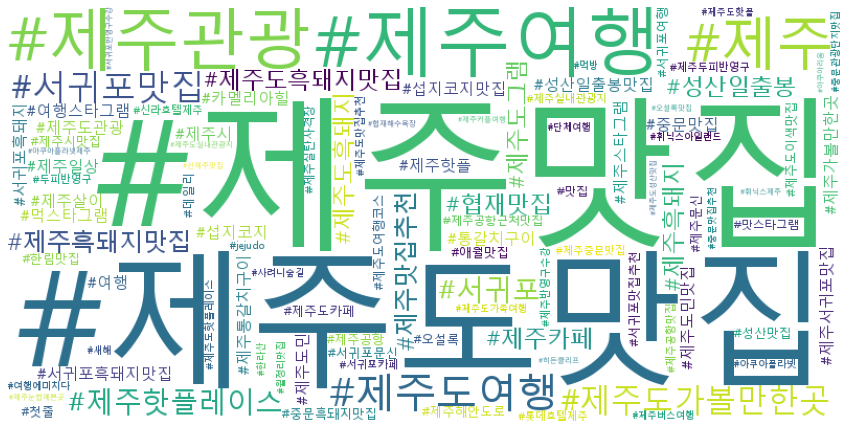

In [52]:
wordcloud = WordCloud(font_path = font_path,
            background_color = 'white',
            max_words = 100,
            width = 800,
            height = 400,
            relative_scaling = 0.3,
            ).generate_from_frequencies(tag_counts_selected)

plt.figure(figsize = (15,10))
plt.imshow(wordcloud)
plt.axis('off')
# plt.show()
# plt.savefig('./pandas/5_Jeju_Hotplace/word_cloud_class.png')